## Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

### Load the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [3]:
#Read the data
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA(Explotary data analysis)

In [4]:
#Data Structure
data.shape

(50, 5)

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### To check for non null values and data type

In [6]:
data.info() #no-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Duplicates

In [8]:
#Count of duplicated rows
data[data.duplicated()].shape
# No dulicate in 5 column

(0, 5)

### Outliers

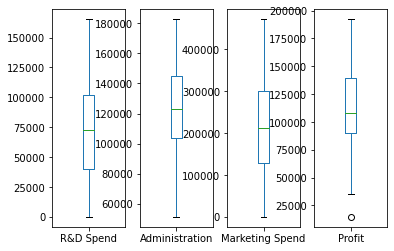

In [9]:
data.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

### Data type conversion

In [10]:
data['State']=data['State'].astype('category')      
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.8 KB


In [11]:
#Checking the categories of State variable
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [12]:
#Getting dummy variables
data1= pd.get_dummies(data,columns=['State'])
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Rename the columns

In [13]:
#Renaming the columns
data1 = data1.rename({'R&D Spend':'RnD', 'Administration':'Admin', 'Marketing Spend':'MS', 'Profit':'Profit',
       'State_California':'CA', 'State_Florida':'FL', 'State_New York':'NY'},axis=1)

In [14]:
data1.columns

Index(['RnD', 'Admin', 'MS', 'Profit', 'CA', 'FL', 'NY'], dtype='object')

# Scatter plot and Correlation analysis

In [15]:
# To find the correlation btw x1=RnD, x2=Admin, x3=MS, x4=State and y=Profit
data1.corr()#Correlation of profit with admin is very less

,RnD,Admin,MS,Profit,CA,FL,NY
RnD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
CA,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
FL,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


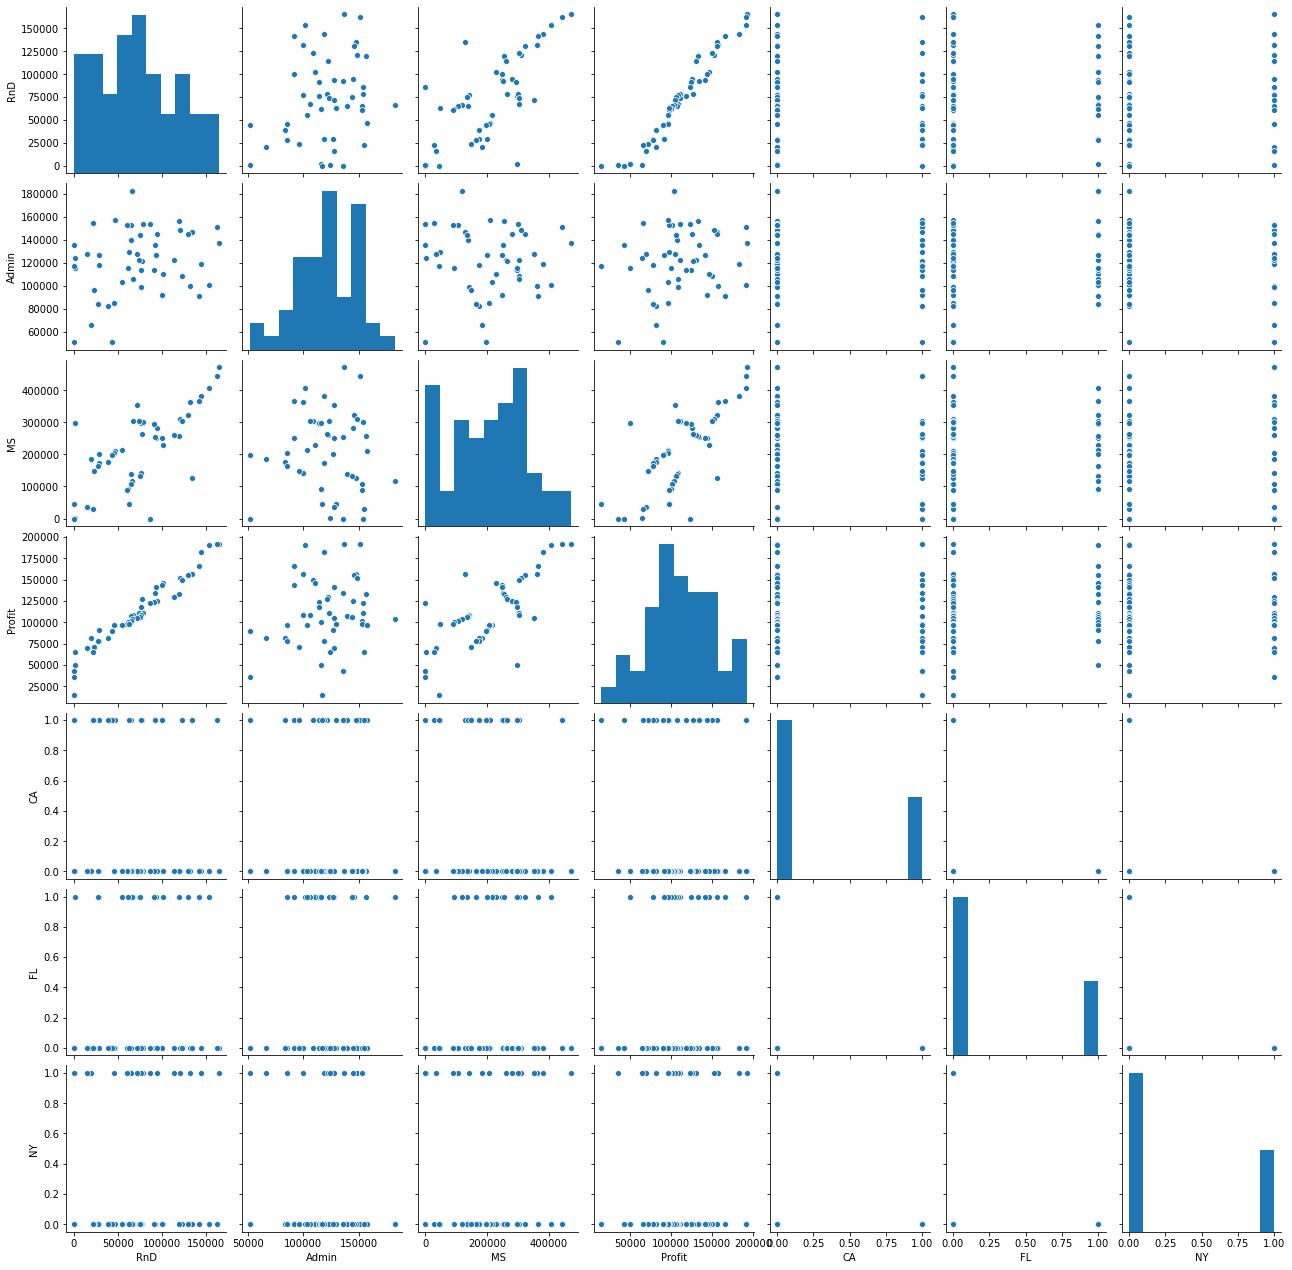

In [16]:
sns.pairplot (data=data1)

### Building the regression model

In [17]:
import statsmodels.formula.api as smf
model1 = smf.ols('Profit~RnD+Admin+MS+CA+FL+NY',data=data1).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.34e-27
Time:                        17:52:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RnD            0.8060      0.046     17.369      0.000       0.712       0.900
Admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS             0.0270      0.017      1.574      0.123      -0.008       0.062
CA          1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
FL          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
NY          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
# Finding Coefficient parameters
model1.params

Intercept    37633.233317
RnD              0.806023
Admin           -0.027004
MS               0.026980
CA           12492.110514
FL           12690.899307
NY           12450.223495
dtype: float64

In [20]:
# Finding tvalues and pvalues
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.417409
RnD          17.368580
Admin        -0.517012
MS            1.573889
CA            5.099242
FL            4.654306
NY            5.007401
dtype: float64 
 Intercept    2.807645e-09
RnD          2.578772e-21
Admin        6.077373e-01
MS           1.226769e-01
CA           6.942555e-06
FL           2.992503e-05
NY           9.409010e-06
dtype: float64


In [21]:
# Finding Rsquared Values
(model1.rsquared,model1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

### As per Model 1, admin and ms are not significant, hence checking individually

In [22]:
ml_adm= smf.ols('Profit~Admin ',data=data1).fit()

In [23]:
ml_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.162
Time:                        17:52:43   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# As per model 1a, Admin is not significant.

In [25]:
ml_ms = smf.ols('Profit~MS',data=data1).fit()

In [26]:
ml_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        17:52:43   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# As per model 1b, MS is significant

### Calculating VIF to check colinearity factor

In [28]:
rsq_RnD = smf.ols('RnD~Admin+MS',data=data1).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD) 

rsq_Admin = smf.ols('Admin~RnD+MS',data=data1).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin) 

rsq_MS = smf.ols('MS~RnD+Admin',data=data1).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 


d1 = {'Variables':['RnD','Admin','MS'],'VIF':[vif_RnD,vif_Admin,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD,2.468903
1,Admin,1.175091
2,MS,2.326773


In [29]:
# All VIF values are less than 20, there are no colinear variables

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

In [30]:
#model1.resid
#y^-y (for each data point what is the diff btw predicted and actual value)

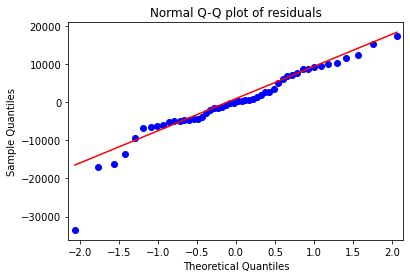

In [31]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
# this will tell us what is the index position of model.resid points which are less than -30000
list(np.where(model1.resid<-30000))

[array([49], dtype=int64)]

### Residual Plot for Homoscedasticity

In [33]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

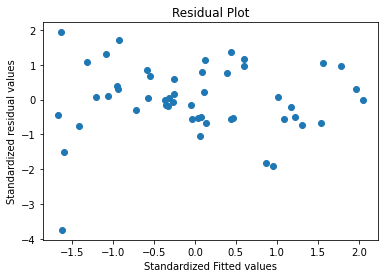

In [34]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [35]:
# Residual plot is not following any pattern, so its a good plot

### Residual Vs Regressors

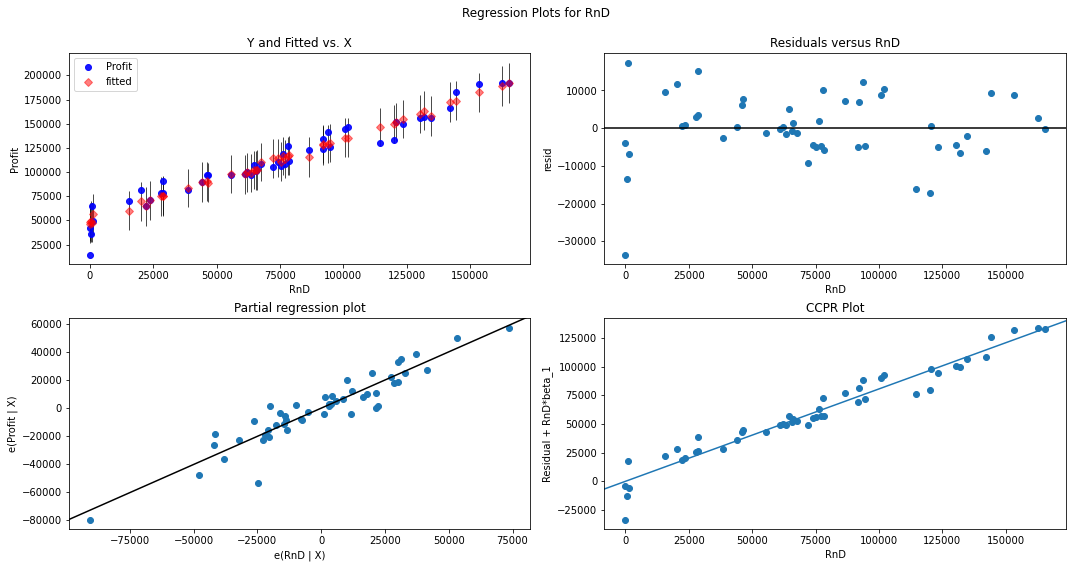

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "RnD", fig=fig)
plt.show()

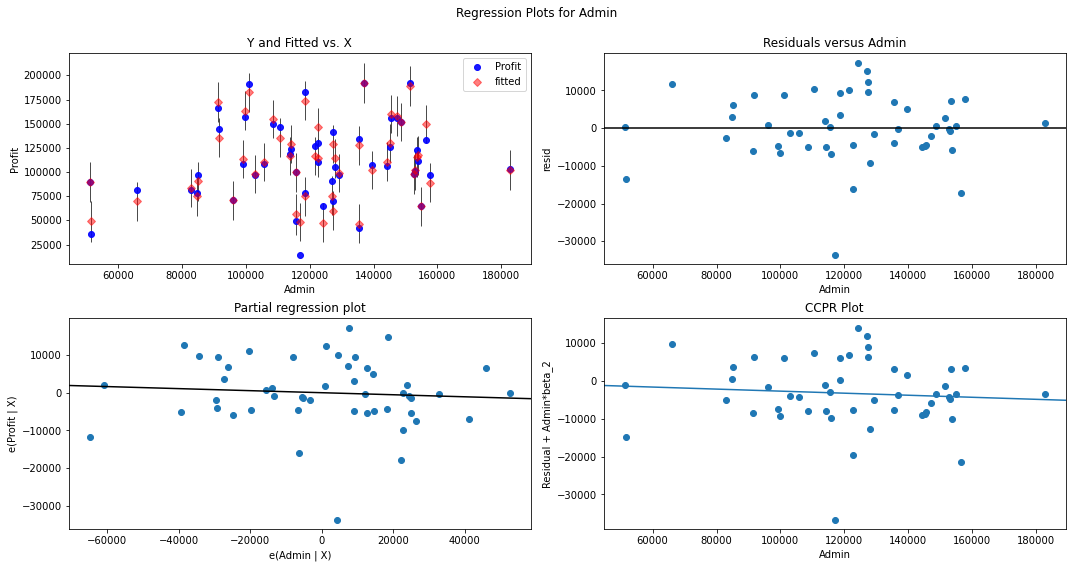

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Admin", fig=fig)
plt.show()

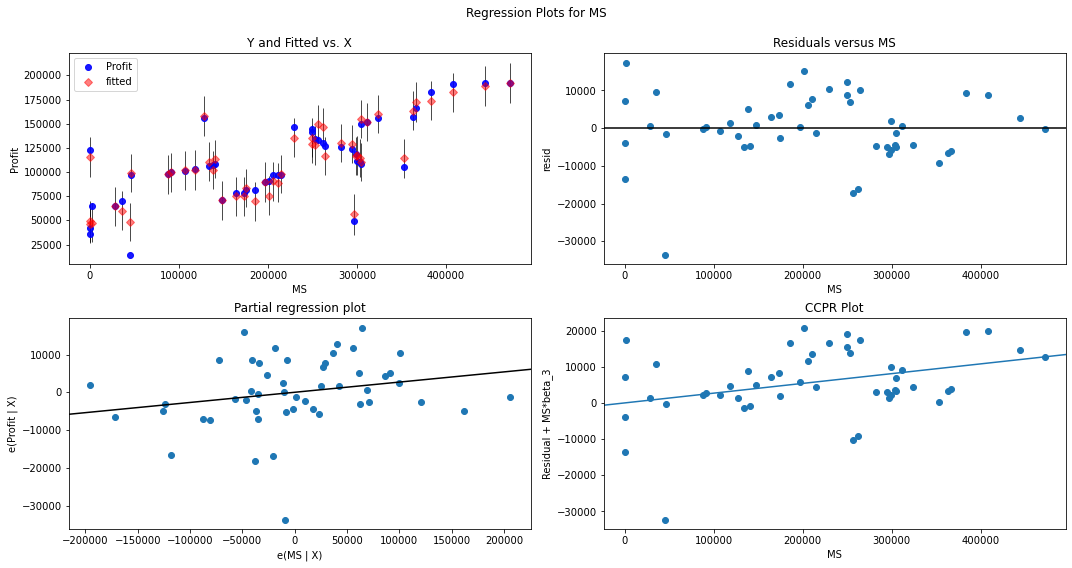

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "MS", fig=fig)
plt.show()

### Model Deletion Diagnostics-Detecting Influencers/Outliers( Cook’s Distance)¶

### Iteration -1

In [39]:
# Identifying the outliers to make the model better using cook's distance technique
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

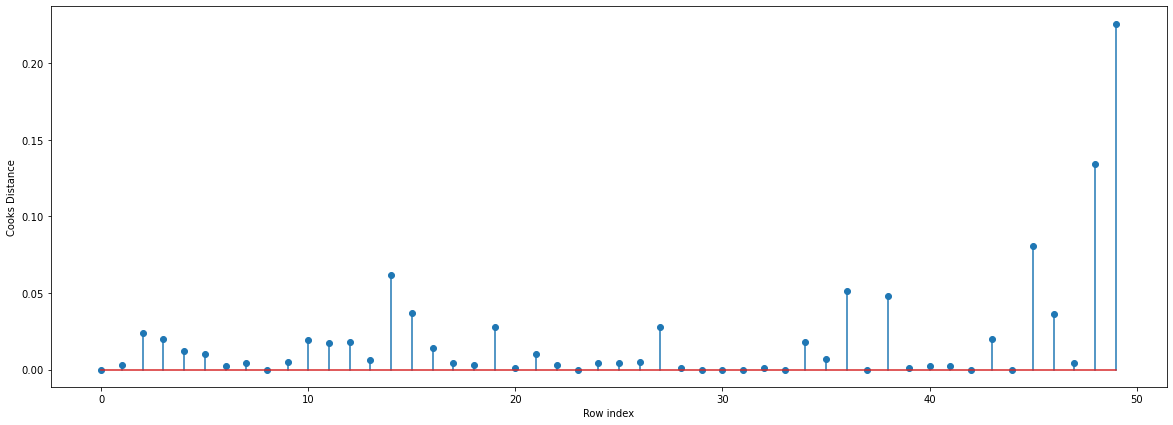

In [40]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
#index and value of influencer where c is more than .15
(np.argmax(c),np.max(c))

(49, 0.22625094501509285)

In [42]:
#From the above plot, it is evident that data point 49 are the influencers
data1[data1.index.isin([49])]

,RnD,Admin,MS,Profit,CA,FL,NY
49,0.0,116983.8,45173.06,14681.4,1,0,0


### Improving the model

In [43]:
#Load the data
data = pd.read_csv('50_Startups.csv')

In [44]:
#Discard the data points which are influencers and reasign the row number (reset_index())
# reset index will rest the numbers, axis = 0 is row and axis = 1 is column

data2=data1.drop(data1.index[[49]],axis=0).reset_index()
data2.tail()

,index,RnD,Admin,MS,Profit,CA,FL,NY
44,44,22177.74,154806.14,28334.72,65200.33,1,0,0
45,45,1000.23,124153.04,1903.93,64926.08,0,0,1
46,46,1315.46,115816.21,297114.46,49490.75,0,1,0
47,47,0.00,135426.92,0.00,42559.73,1,0,0
48,48,542.05,51743.15,0.00,35673.41,0,0,1


In [45]:
#Drop the original index
data2 = data2.drop(['index'],axis=1)
data2.head()

,RnD,Admin,MS,Profit,CA,FL,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [46]:
model2 = smf.ols('Profit~RnD+Admin+MS+CA+FL+NY',data=data2).fit()

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           2.51e-29
Time:                        17:52:53   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
RnD            0.7836      0.039     20.056      0.000       0.705       0.862
Admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
MS             0.0258      0.014      1.804      0.078      -0.003       0.055
CA          1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
FL          1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
NY          1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     6.13e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
# Rsquared value has increased, ms and admin are still insignificant¶

### Iteration -2

In [49]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

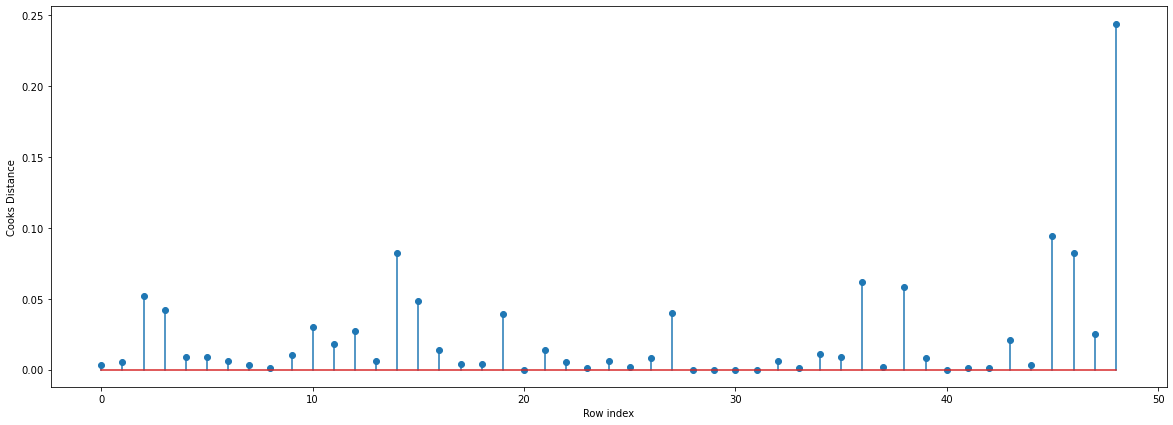

In [50]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
#index and value of influencer where c is more than .15
(np.argmax(c),np.max(c))

(48, 0.24352817571403917)

In [52]:
#From the above plot, it is evident that data point 48 are the influencers
data2[data2.index.isin([48])]

,RnD,Admin,MS,Profit,CA,FL,NY
48,542.05,51743.15,0.0,35673.41,0,0,1


In [53]:
#Discard the data points which are influencers and reasign the row number (reset_index())

data3=data2.drop(data2.index[[48]],axis=0).reset_index()
data3.tail()

,index,RnD,Admin,MS,Profit,CA,FL,NY
43,43,15505.73,127382.30,35534.17,69758.98,0,0,1
44,44,22177.74,154806.14,28334.72,65200.33,1,0,0
45,45,1000.23,124153.04,1903.93,64926.08,0,0,1
46,46,1315.46,115816.21,297114.46,49490.75,0,1,0
47,47,0.00,135426.92,0.00,42559.73,1,0,0


In [54]:
#Drop the original index
data3 = data3.drop(['index'],axis=1)
data3.head()

,RnD,Admin,MS,Profit,CA,FL,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [55]:
model3 = smf.ols('Profit~RnD+Admin+MS+CA+FL+NY',data=data3).fit()

In [56]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           7.02e-29
Time:                        17:52:55   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.409e+04   4569.825      9.648      0.000    3.49e+04    5.33e+04
RnD            0.7888      0.037     21.160      0.000       0.714       0.864
Admin         -0.0621      0.045     -1.381      0.174      -0.153       0.029
MS             0.0179      0.014      1.275      0.209      -0.010       0.046
CA           1.53e+04   2035.915      7.516      0.000    1.12e+04    1.94e+04
FL          1.415e+04   2261.128      6.259      0.000    9588.163    1.87e+04
NY          1.464e+04   2223.793      6.581      0.000    1.01e+04    1.91e+04
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.39e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
#Rsquared value has increased, ms and admin are still insignificant

### Iteration - 3

In [58]:
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

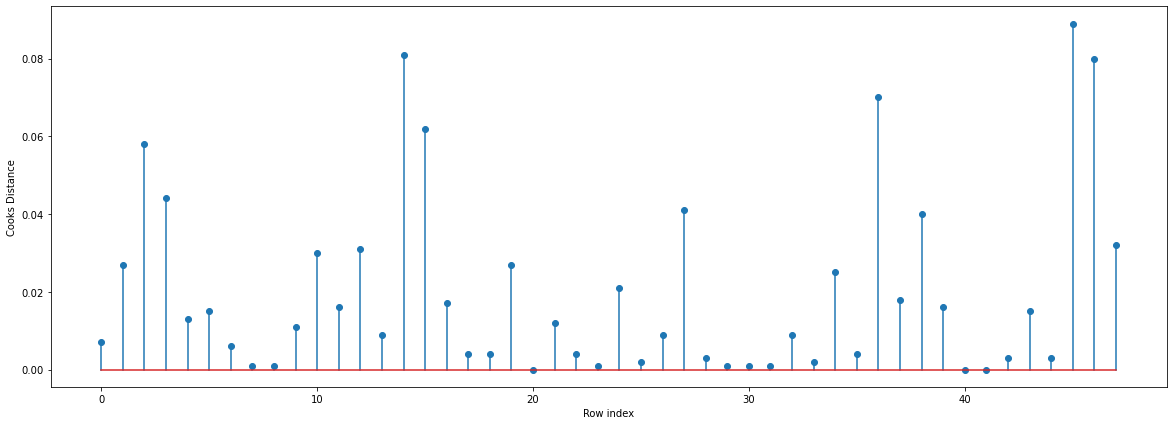

In [59]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

### Since cook's distance of most of the points seems to lie in the same range and only slight change in R value in model 3 from model 2  we can stop the diagnostic process and finalize the model

### Checking the model by predicting the profit of the same data set and comparing it with actual values

In [60]:
pred_profit = pd.DataFrame (model3.predict(data3), columns=['Predict_Profit'])

In [61]:
pred_profit.head()

,Predict_Profit
0,189087.074698
1,186183.370112
2,180288.581217
3,172087.545967
4,171206.768166


In [62]:
Actual_Profit = data3['Profit']

In [63]:
pred_profit1 = pd.concat([Actual_Profit, pred_profit], axis=1)

In [64]:
pred_profit1.head()

,Profit,Predict_Profit
0,192261.83,189087.074698
1,191792.06,186183.370112
2,191050.39,180288.581217
3,182901.99,172087.545967
4,166187.94,171206.768166


In [65]:
Error = pd.DataFrame (((pred_profit1['Predict_Profit']- pred_profit1['Profit'])/pred_profit1['Profit']), columns=['Error'])
Error.head()

,Error
0,-0.016513
1,-0.029244
2,-0.056330
3,-0.059127
4,0.030200


In [66]:
result = pd.concat ([pred_profit1, Error], axis=1)
result.head()

,Profit,Predict_Profit,Error
0,192261.83,189087.074698,-0.016513
1,191792.06,186183.370112,-0.029244
2,191050.39,180288.581217,-0.056330
3,182901.99,172087.545967,-0.059127
4,166187.94,171206.768166,0.030200


In [67]:
result.style.format({'Profit': "{:.2f}",'Predict_Profit': "{:.2f}",'Error': "{:.2%}"})

,Profit,Predict_Profit,Error
0,192261.83,189087.07,-1.65%
1,191792.06,186183.37,-2.92%
2,191050.39,180288.58,-5.63%
3,182901.99,172087.55,-5.91%
4,166187.94,171206.77,3.02%
5,156991.12,163039.18,3.85%
6,156122.51,158709.12,1.66%
7,155752.60,157770.47,1.30%
8,152211.77,150142.26,-1.36%
9,149759.96,155379.92,3.75%


In [68]:
result.Error.mean()

0.004337744560180249

In [69]:
# Since the mean of all the error values is close to 0, hence we can say regression equation for forecasting is working well.